<a href="https://colab.research.google.com/github/tlacloc/analisis-defunciones-nacimientos-2022/blob/main/2021_analisis_nacimientos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Libreria para cargar nuestro drive
from google.colab import drive

# Cargamos nuestro drive en nuestro notebook
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls "/content/drive/MyDrive/Colab Notebooks"

'Copy of SDC11_actividad1_Badillo_Casanova.ipynb'   SDC_12		 test.ipynb
'EVC Hackathon Files'				    SDC_13		 Untitled0.ipynb
 Image						    SDC_14		 Untitled1.ipynb
 miriam						    SDC_15		 Vero
 SCD_12_Erick_Casanova.ipynb			    test-forvero.ipynb	 Visualizacion


In [ ]:
# Librerias de ayuda
import numpy as np
import pandas as pd
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/miriam/nacimientos_2021.csv', low_memory=False)
df.head(10)

,NACIOEXTRANJERO,ENTIDADNACIMIENTO,MUNICIPIONACIMIENTO,EDAD,SECONSIDERAINDIGENA,HABLALENGUAINDIGENA,FECHANACIMIENTOMADRE,ESTADOCONYUGAL,RESIDEEXTRANJERO,ENTIDADRESIDENCIA,...,TIPOMEDICOATENDIO,ENTIDADFEDERATIVAPARTO,MUNICIPIOPARTO,LOCALIDADPARTO,CERTIFICADOPOR,CLUESCERTIFICA,ENTIDADFEDERATIVACERTIFICA,MUNICIPIOCERTIFICA,LOCALIDADCERTIFICA,FECHACERTIFICADO
0,2,15,33,21,2,2,10/02/1999,4,2,15,...,11.0,15,33,1,7,NaN,15,33,1,06/01/2021
1,2,14,39,37,2,2,22/10/1983,4,2,26,...,11.0,26,43,1,1,NaN,26,43,1,03/01/2021
2,2,30,130,37,2,2,27/03/1983,4,2,23,...,11.0,23,8,1,1,QRSSA018001,23,8,1,28/01/2021
3,2,7,19,26,1,2,11/10/1994,1,2,23,...,11.0,23,8,1,1,QRSSA018001,23,8,1,09/02/2021
4,2,23,7,15,1,2,26/10/2005,1,2,23,...,11.0,23,8,1,1,QRSSA018001,23,8,1,11/02/2021
5,1,88,997,31,2,2,09/06/1989,1,2,23,...,11.0,23,8,1,1,QRSSA018001,23,8,1,26/03/2021
6,2,27,4,17,2,2,31/12/2003,1,2,23,...,11.0,23,8,1,1,QRSSA018001,23,8,1,10/03/2021
7,2,23,4,18,2,2,20/11/2002,1,2,23,...,11.0,23,8,1,1,QRSSA018001,23,8,1,12/03/2021
8,1,88,997,36,2,2,02/02/1985,1,2,23,...,11.0,23,8,1,1,QRSSA018001,23,8,1,02/03/2021
9,2,31,69,30,1,1,30/01/1991,1,2,23,...,11.0,23,8,1,1,QRSSA018001,23,8,1,26/02/2021


In [ ]:
oldColumns = df.columns
oldColumns

Index(['NACIOEXTRANJERO', 'ENTIDADNACIMIENTO', 'MUNICIPIONACIMIENTO', 'EDAD',
       'SECONSIDERAINDIGENA', 'HABLALENGUAINDIGENA', 'FECHANACIMIENTOMADRE',
       'ESTADOCONYUGAL', 'RESIDEEXTRANJERO', 'ENTIDADRESIDENCIA',
       'MUNICIPIORESIDENCIA', 'LOCALIDADRESIDENCIA', 'NUMEROEMBARAZOS',
       'HIJOSNACIDOSMUERTOS', 'HIJOSNACIDOSVIVOS', 'HIJOSSOBREVIVIENTES',
       'CONDICIONHIJOANTERIOR', 'VIVEHIJOANTERIOR', 'ORDENNACIMIENTO',
       'ATENCIONPRENATAL', 'TRIMESTREPRIMERCONSULTA', 'TOTALCONSULTAS',
       'SOBREVIVIOPARTO', 'AFILIACION', 'ESCOLARIDAD', 'INTERRUMPIOESTUDIOS',
       'CLAVEOCUPACIONHABITUAL', 'TRABAJAACTUALMENTE', 'EDADPADRE',
       'FECHANACIMIENTO', 'HORANACIMIENTO', 'SEXO', 'EDADGESTACIONAL', 'TALLA',
       'PESO', 'APGAR', 'SILVERMAN', 'TAMIZAUDITIVO', 'VACUNA_BCG',
       'VACUNAHEPATITIS_B', 'VITAMINA_A', 'VITAMINA_K', 'PRODUCTOEMBARAZO',
       'ORDENPRODUCTO', 'TOTALPRODUCTOS', 'CODIGOCIEANOMALIA1',
       'CODIGOCIEANOMALIA2', 'LUGARNACIMIENTO', 'CLUES',

Variables que sd van a utilizar

In [ ]:
# Limpieza de datos
# Se eliminaran las columnas que no se utilizaran

columnsToRemove = [
    "TAMIZAUDITIVO",
    "HIJOSSOBREVIVIENTES",
    "FECHANACIMIENTO",
    "ORDENPRODUCTO",
  "NACIOEXTRANJERO",
  "ENTIDADNACIMIENTO",
  "MUNICIPIONACIMIENTO",
  "SECONSIDERAINDIGENA",
  "HABLALENGUAINDIGENA",
  "FECHANACIMIENTOMADRE",
  "RESIDEEXTRANJERO",
  "ESTADOCONYUGAL",
  "ENTIDADRESIDENCIA",
  "MUNICIPIORESIDENCIA",
  "LOCALIDADRESIDENCIA",
  "HIJOSNACIDOSVIVOS",
  "CONDICIONHIJOANTERIOR",
  "VIVEHIJOANTERIOR",
  "ORDENNACIMIENTO",
  "AFILIACION",
  "INTERRUMPIOESTUDIOS",
  "CLAVEOCUPACIONHABITUAL",
  "TRABAJAACTUALMENTE",
  "HORANACIMIENTO",
  "VACUNA_BCG",
  "VACUNAHEPATITIS_B",
  "VITAMINA_A",
  "VITAMINA_K",
  # Relacionado a gemelos
  # "PRODUCTOEMBARAZO",
  "ORDENPRODUCTO",
  # "TOTALPRODUCTOS",
  "CLUES",
  "TIEMPOTRASLADO",
  # "RESOLUCIONEMBARAZO",
  # "UTILIZOFORCEPS",
  "TIPOCESAREA",
  "PERSONALATENDIO",
  "TIPOMEDICOATENDIO",
  "MUNICIPIOPARTO",
  "LOCALIDADPARTO",
  "CERTIFICADOPOR",
  "CLUESCERTIFICA",
  "ENTIDADFEDERATIVACERTIFICA",
  "MUNICIPIOCERTIFICA",
  "LOCALIDADCERTIFICA",
  "FECHACERTIFICADO",
  "LUGARNACIMIENTO"
]

df.drop(columnsToRemove, inplace=True, axis=1)

In [ ]:
columnsToReview = df.columns
columnsToReview

Index(['EDAD', 'NUMEROEMBARAZOS', 'HIJOSNACIDOSMUERTOS', 'ATENCIONPRENATAL',
       'TRIMESTREPRIMERCONSULTA', 'TOTALCONSULTAS', 'SOBREVIVIOPARTO',
       'ESCOLARIDAD', 'EDADPADRE', 'SEXO', 'EDADGESTACIONAL', 'TALLA', 'PESO',
       'APGAR', 'SILVERMAN', 'PRODUCTOEMBARAZO', 'TOTALPRODUCTOS',
       'CODIGOCIEANOMALIA1', 'CODIGOCIEANOMALIA2', 'RESOLUCIONEMBARAZO',
       'UTILIZOFORCEPS', 'ENTIDADFEDERATIVAPARTO'],
      dtype='object')

In [ ]:
#df=df.drop(df[df['EDAD']==999].index)
#df=df.drop(df[df['EDAD']==888].index)
#df=df.drop(df[df['NUMEROEMBARAZOS']==99].index)
#df=df.drop(df[df['HIJOSNACIDOSMUERTOS']==99].index)
#df=df.drop(df[df['ATENCIONPRENATAL']==9].index)
#df=df.drop(df[df['TRIMESTREPRIMERCONSULTA']==9].index)
#df=df.drop(df[df['TOTALCONSULTAS']==99].index)
#df=df.drop(df[df['SOBREVIVIOPARTO']==9].index)
#df=df.drop(df[df['ESCOLARIDAD']==999].index)
#df=df.drop(df[df['EDADPADRE']==999].index)
#df=df.drop(df[df['SEXO']==99].index)
#df=df.drop(df[df['EDADGESTACIONAL']==99].index)
#df=df.drop(df[df['TALLA']==99].index)
#df=df.drop(df[df['PESO']==9999].index)
#df=df.drop(df[df['TALLA']==9].index)
#df=df.drop(df[df['APGAR']==99].index)
#df=df.drop(df[df['SILVERMAN']==99].index)
#df=df.drop(df[df['UTILIZOFORCEPS']==9].index)

In [ ]:
df.head(10)

,EDAD,NUMEROEMBARAZOS,HIJOSNACIDOSMUERTOS,ATENCIONPRENATAL,TRIMESTREPRIMERCONSULTA,TOTALCONSULTAS,SOBREVIVIOPARTO,ESCOLARIDAD,EDADPADRE,SEXO,...,PESO,APGAR,SILVERMAN,PRODUCTOEMBARAZO,TOTALPRODUCTOS,CODIGOCIEANOMALIA1,CODIGOCIEANOMALIA2,RESOLUCIONEMBARAZO,UTILIZOFORCEPS,ENTIDADFEDERATIVAPARTO
0,21,2,0,1,1,12.0,2,72,NaN,2,...,3100,9,1,1,NaN,0000,0000,3,8,15
1,37,2,0,1,1,14.0,1,81,NaN,1,...,3300,9,1,1,NaN,0000,0000,3,8,26
2,37,4,0,1,2,5.0,1,52,NaN,1,...,2920,8,0,1,NaN,0000,0000,1,8,23
3,26,2,0,1,2,5.0,1,32,NaN,2,...,3175,8,0,1,NaN,0000,0000,1,8,23
4,15,1,0,1,2,5.0,1,31,NaN,2,...,1520,8,0,1,NaN,P220,P220,3,8,23
5,31,2,0,1,1,4.0,1,71,NaN,1,...,3050,9,0,1,NaN,0000,0000,1,8,23
6,17,1,0,1,3,6.0,1,31,NaN,1,...,2875,9,0,1,NaN,0000,0000,1,8,23
7,18,1,0,1,2,6.0,1,51,NaN,1,...,2990,9,0,1,NaN,0000,0000,3,8,23
8,36,2,0,1,2,6.0,1,81,NaN,1,...,3805,8,0,1,NaN,0000,0000,1,8,23
9,30,2,0,1,1,9.0,1,71,NaN,2,...,2805,8,0,1,NaN,0000,0000,3,8,23


Variable: presencia o ausencia de Malformaciones Craneofaciales MCF

In [ ]:
def update_codes(base_array):
  new_codes = []
  for value in base_array:
    for i in range(0, 10):
      new_codes.append(value[:-1] + str(i))

  return new_codes

In [ ]:
codigos_mc = update_codes(['Q100', 'Q110', 'Q120', 'Q130', 'Q140', 'Q150', 'Q160', 'Q170', 'Q180', 'Q300', 'Q350', 'Q360', 'Q370', 'Q380'])
anomalias_mc = df['CODIGOCIEANOMALIA1'].isin(codigos_mc) | df['CODIGOCIEANOMALIA2'].isin(codigos_mc)
mc_df = df[anomalias_mc]
mc_df

,EDAD,NUMEROEMBARAZOS,HIJOSNACIDOSMUERTOS,ATENCIONPRENATAL,TRIMESTREPRIMERCONSULTA,TOTALCONSULTAS,SOBREVIVIOPARTO,ESCOLARIDAD,EDADPADRE,SEXO,...,PESO,APGAR,SILVERMAN,PRODUCTOEMBARAZO,TOTALPRODUCTOS,CODIGOCIEANOMALIA1,CODIGOCIEANOMALIA2,RESOLUCIONEMBARAZO,UTILIZOFORCEPS,ENTIDADFEDERATIVAPARTO
592,17,1,0,1,2,5.0,1,72,NaN,1,...,3190,9,0,1,NaN,Q173,0000,1,8,9
981,19,2,0,2,0,0.0,1,31,NaN,2,...,2155,9,2,1,NaN,Q170,Q170,1,8,9
1127,33,3,0,1,1,7.0,1,72,NaN,1,...,3600,9,0,1,NaN,Q249,Q371,1,8,9
1215,35,2,0,1,1,10.0,1,81,NaN,1,...,3115,9,3,1,NaN,Q189,0000,3,8,9
1724,19,1,0,1,1,7.0,1,82,NaN,1,...,3140,9,1,1,NaN,Q300,Q300,3,8,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638537,21,1,0,1,2,1.0,1,51,NaN,1,...,2480,9,0,1,NaN,Q379,0000,1,8,15
1638770,35,4,0,1,1,5.0,1,51,NaN,2,...,2600,9,0,1,NaN,Q909,Q138,3,8,15
1639031,36,2,0,1,1,7.0,1,32,NaN,2,...,9999,9,3,1,NaN,Q353,0000,3,8,18
1639399,23,3,0,2,0,0.0,1,71,NaN,2,...,2370,9,0,1,NaN,Q181,0000,3,8,32


In [ ]:
ttest_ind(df['APGAR'], df['SILVERMAN'])

TtestResult(statistic=967.8255300069542, pvalue=0.0, df=3278956.0)

## Variable categórica clasificación de MCF
- Oftalmológicas Q100 Q110 Q120 Q130 Q140 Q150
- Oído Q160 Q170
- Cara y cuello Q180
- Nariz Q300
- Lengua y boca Q380 Q350 Q360 Q370

### Oftalmo

In [ ]:
# Valores par oftalmo
codigos_oftalmo = update_codes(['Q100', 'Q110', 'Q120', 'Q130', 'Q140', 'Q150'])
anomalias_oftalmo = df['CODIGOCIEANOMALIA1'].isin(codigos_oftalmo) | df['CODIGOCIEANOMALIA2'].isin(codigos_oftalmo)
anomalias_oftalmo_df = df[anomalias_oftalmo]
anomalias_oftalmo_df

,EDAD,NUMEROEMBARAZOS,HIJOSNACIDOSMUERTOS,ATENCIONPRENATAL,TRIMESTREPRIMERCONSULTA,TOTALCONSULTAS,SOBREVIVIOPARTO,ESCOLARIDAD,EDADPADRE,SEXO,...,PESO,APGAR,SILVERMAN,PRODUCTOEMBARAZO,TOTALPRODUCTOS,CODIGOCIEANOMALIA1,CODIGOCIEANOMALIA2,RESOLUCIONEMBARAZO,UTILIZOFORCEPS,ENTIDADFEDERATIVAPARTO
37703,36,3,0,1,1,8.0,1,51,37.0,2,...,9999,3,2,1,NaN,Q793,Q120,3,8,11
40234,22,4,0,1,1,5.0,1,71,24.0,1,...,3060,7,0,1,NaN,Q110,0000,1,8,11
53568,31,3,0,1,1,4.0,1,31,30.0,2,...,650,1,0,1,NaN,Q103,0000,1,8,14
60377,23,2,0,1,1,10.0,1,71,25.0,1,...,3740,9,0,1,NaN,Q158,0000,1,8,14
75801,27,2,0,1,2,6.0,1,71,23.0,2,...,3000,9,0,1,NaN,Q159,Q111,1,8,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1619301,22,2,0,1,1,5.0,1,71,NaN,2,...,2520,8,0,1,NaN,Q159,P838,3,8,1
1620682,19,1,0,1,1,9.0,1,51,NaN,1,...,3810,9,0,1,NaN,Q103,0000,2,1,11
1635649,38,5,1,1,3,2.0,1,51,NaN,1,...,2700,9,0,1,NaN,Q103,Q302,1,8,9
1637241,35,3,0,1,2,4.0,1,51,NaN,2,...,600,9,3,1,NaN,Q158,Q158,3,8,15


### Oido

In [ ]:
# Valores par oido
codigos_oido = update_codes(['Q160', 'Q170'])
anomalias_oido = df['CODIGOCIEANOMALIA1'].isin(codigos_oido) | df['CODIGOCIEANOMALIA2'].isin(codigos_oido)
anomalias_oido_df = df[anomalias_oido]
anomalias_oido_df

,EDAD,NUMEROEMBARAZOS,HIJOSNACIDOSMUERTOS,ATENCIONPRENATAL,TRIMESTREPRIMERCONSULTA,TOTALCONSULTAS,SOBREVIVIOPARTO,ESCOLARIDAD,EDADPADRE,SEXO,...,PESO,APGAR,SILVERMAN,PRODUCTOEMBARAZO,TOTALPRODUCTOS,CODIGOCIEANOMALIA1,CODIGOCIEANOMALIA2,RESOLUCIONEMBARAZO,UTILIZOFORCEPS,ENTIDADFEDERATIVAPARTO
592,17,1,0,1,2,5.0,1,72,NaN,1,...,3190,9,0,1,NaN,Q173,0000,1,8,9
981,19,2,0,2,0,0.0,1,31,NaN,2,...,2155,9,2,1,NaN,Q170,Q170,1,8,9
2733,38,2,0,1,2,5.0,1,71,NaN,1,...,3420,9,0,1,NaN,Q170,0000,3,8,30
3081,30,1,0,1,1,9.0,1,81,NaN,1,...,2700,9,0,1,NaN,Q172,0000,3,8,32
5125,29,4,0,1,1,12.0,1,31,NaN,2,...,3280,9,0,1,NaN,Q173,Q161,1,8,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1631437,25,5,0,1,2,4.0,1,51,NaN,1,...,3012,9,0,1,NaN,Q172,0000,1,8,32
1635808,23,3,0,1,3,2.0,1,32,NaN,2,...,3330,8,3,1,NaN,Q170,0000,3,8,11
1636428,29,3,1,1,2,8.0,1,32,NaN,2,...,2970,9,0,1,NaN,Q170,0000,1,8,13
1636969,21,2,0,2,0,0.0,1,51,NaN,1,...,1880,9,5,1,NaN,Q172,Q172,8,8,11


### Cara y cuello

In [ ]:
# Valores par cara y cuello
codigos_cara_cuello = update_codes(['Q180'])
anomalias_cara_cuello = df['CODIGOCIEANOMALIA1'].isin(codigos_cara_cuello) | df['CODIGOCIEANOMALIA2'].isin(codigos_cara_cuello)
anomalias_cara_cuello_df = df[anomalias_cara_cuello]
anomalias_cara_cuello_df

,EDAD,NUMEROEMBARAZOS,HIJOSNACIDOSMUERTOS,ATENCIONPRENATAL,TRIMESTREPRIMERCONSULTA,TOTALCONSULTAS,SOBREVIVIOPARTO,ESCOLARIDAD,EDADPADRE,SEXO,...,PESO,APGAR,SILVERMAN,PRODUCTOEMBARAZO,TOTALPRODUCTOS,CODIGOCIEANOMALIA1,CODIGOCIEANOMALIA2,RESOLUCIONEMBARAZO,UTILIZOFORCEPS,ENTIDADFEDERATIVAPARTO
1215,35,2,0,1,1,10.0,1,81,NaN,1,...,3115,9,3,1,NaN,Q189,0000,3,8,9
71277,23,3,1,1,1,5.0,1,51,99.0,1,...,3000,9,0,1,NaN,Q181,0000,1,8,15
76896,40,4,0,2,0,0.0,1,32,51.0,1,...,1170,2,0,1,NaN,Q189,P072,3,8,15
140542,28,1,0,1,1,7.0,1,81,30.0,2,...,1650,7,2,1,NaN,Q188,Q188,1,8,24
142975,32,2,0,1,1,9.0,1,81,25.0,1,...,4170,9,0,1,NaN,Q184,0000,3,8,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1626928,39,4,0,1,1,3.0,1,51,NaN,2,...,4300,8,0,1,NaN,Q184,0000,1,8,1
1627258,28,2,0,1,2,1.0,1,51,NaN,1,...,9999,7,8,1,NaN,Q184,0000,3,8,1
1631119,18,2,0,1,1,4.0,1,51,NaN,1,...,2450,9,0,1,NaN,Q188,P128,1,8,1
1633439,22,2,0,1,0,99.0,1,71,NaN,2,...,3900,9,0,1,NaN,Q189,Q829,1,8,1


### Nariz

In [ ]:
# Valores para nariz
codigos_nariz = update_codes(['Q300'])
anomalias_nariz = df['CODIGOCIEANOMALIA1'].isin(codigos_nariz) | df['CODIGOCIEANOMALIA2'].isin(codigos_nariz)
anomalias_nariz_df = df[anomalias_nariz]
anomalias_nariz_df

,EDAD,NUMEROEMBARAZOS,HIJOSNACIDOSMUERTOS,ATENCIONPRENATAL,TRIMESTREPRIMERCONSULTA,TOTALCONSULTAS,SOBREVIVIOPARTO,ESCOLARIDAD,EDADPADRE,SEXO,...,PESO,APGAR,SILVERMAN,PRODUCTOEMBARAZO,TOTALPRODUCTOS,CODIGOCIEANOMALIA1,CODIGOCIEANOMALIA2,RESOLUCIONEMBARAZO,UTILIZOFORCEPS,ENTIDADFEDERATIVAPARTO
1724,19,1,0,1,1,7.0,1,82,NaN,1,...,3140,9,1,1,NaN,Q300,Q300,3,8,9
2148,19,1,0,1,1,5.0,1,51,NaN,2,...,3645,9,1,1,NaN,Q300,Q300,1,8,9
25082,36,3,0,1,2,5.0,1,31,99.0,1,...,2800,9,0,1,NaN,Q309,0000,1,8,8
56253,18,1,0,1,1,5.0,1,71,19.0,2,...,9999,9,0,1,NaN,Q300,Q668,1,8,14
74048,16,1,0,1,9,1.0,1,51,15.0,2,...,3000,9,0,1,NaN,Q309,0000,1,8,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1601588,36,3,1,1,1,5.0,1,51,NaN,2,...,2730,9,0,1,NaN,Q385,Q309,3,8,11
1602259,18,1,0,1,1,2.0,1,51,NaN,2,...,2985,9,1,1,NaN,Q308,0000,1,8,9
1612482,15,1,0,1,1,6.0,1,51,NaN,1,...,2580,3,99,1,NaN,Q752,Q308,3,8,11
1619862,20,1,0,1,1,5.0,1,51,NaN,1,...,3200,9,0,1,NaN,Q309,0000,1,8,4


### Lengua y boca

In [ ]:
# Valores para lengua y boca
codigos_lengua_boca = update_codes(['Q380', 'Q350', 'Q360', 'Q370'])
anomalias_lengua_boca = df['CODIGOCIEANOMALIA1'].isin(codigos_lengua_boca) | df['CODIGOCIEANOMALIA2'].isin(codigos_lengua_boca)
anomalias_lengua_boca_df = df[anomalias_lengua_boca]
anomalias_lengua_boca_df

,EDAD,NUMEROEMBARAZOS,HIJOSNACIDOSMUERTOS,ATENCIONPRENATAL,TRIMESTREPRIMERCONSULTA,TOTALCONSULTAS,SOBREVIVIOPARTO,ESCOLARIDAD,EDADPADRE,SEXO,...,PESO,APGAR,SILVERMAN,PRODUCTOEMBARAZO,TOTALPRODUCTOS,CODIGOCIEANOMALIA1,CODIGOCIEANOMALIA2,RESOLUCIONEMBARAZO,UTILIZOFORCEPS,ENTIDADFEDERATIVAPARTO
1127,33,3,0,1,1,7.0,1,72,NaN,1,...,3600,9,0,1,NaN,Q249,Q371,1,8,9
3994,29,1,0,1,1,10.0,1,51,NaN,1,...,3000,10,0,1,NaN,Q379,0000,3,8,32
5102,26,2,0,1,1,5.0,1,51,NaN,2,...,2550,9,0,1,NaN,Q359,0000,3,8,32
7068,24,4,1,1,2,10.0,1,72,30.0,1,...,3400,9,0,1,NaN,Q379,0000,1,8,3
10170,23,4,0,1,2,6.0,1,51,99.0,1,...,3740,9,0,1,NaN,Q379,0000,3,8,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638126,17,1,0,1,1,7.0,1,51,NaN,1,...,3760,9,0,1,NaN,Q369,Q359,1,8,22
1638389,19,3,1,1,1,9.0,1,32,NaN,1,...,3590,9,0,1,NaN,Q359,Q359,1,8,11
1638537,21,1,0,1,2,1.0,1,51,NaN,1,...,2480,9,0,1,NaN,Q379,0000,1,8,15
1639031,36,2,0,1,1,7.0,1,32,NaN,2,...,9999,9,3,1,NaN,Q353,0000,3,8,18


# PX sanos

los sanos son los que no tienen nada o 0000 en anomalia 1 o 2

In [ ]:
nmc = (df['CODIGOCIEANOMALIA1'] == '0000') & (df['CODIGOCIEANOMALIA2'] == '0000')
nmc_df = df[nmc]
nmc_df

,EDAD,NUMEROEMBARAZOS,HIJOSNACIDOSMUERTOS,ATENCIONPRENATAL,TRIMESTREPRIMERCONSULTA,TOTALCONSULTAS,SOBREVIVIOPARTO,ESCOLARIDAD,EDADPADRE,SEXO,...,PESO,APGAR,SILVERMAN,PRODUCTOEMBARAZO,TOTALPRODUCTOS,CODIGOCIEANOMALIA1,CODIGOCIEANOMALIA2,RESOLUCIONEMBARAZO,UTILIZOFORCEPS,ENTIDADFEDERATIVAPARTO
0,21,2,0,1,1,12.0,2,72,NaN,2,...,3100,9,1,1,NaN,0000,0000,3,8,15
1,37,2,0,1,1,14.0,1,81,NaN,1,...,3300,9,1,1,NaN,0000,0000,3,8,26
2,37,4,0,1,2,5.0,1,52,NaN,1,...,2920,8,0,1,NaN,0000,0000,1,8,23
3,26,2,0,1,2,5.0,1,32,NaN,2,...,3175,8,0,1,NaN,0000,0000,1,8,23
5,31,2,0,1,1,4.0,1,71,NaN,1,...,3050,9,0,1,NaN,0000,0000,1,8,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1639474,24,2,0,1,2,6.0,1,51,NaN,2,...,3125,9,0,1,NaN,0000,0000,1,8,15
1639475,18,1,0,1,2,6.0,1,51,NaN,2,...,2730,9,0,1,NaN,0000,0000,8,8,19
1639476,19,1,0,1,2,6.0,1,32,NaN,1,...,3200,9,1,1,NaN,0000,0000,1,8,13
1639477,16,1,0,1,2,5.0,1,51,NaN,1,...,3050,9,0,1,NaN,0000,0000,1,8,13


### Variable segunda malformacion

In [ ]:
codigos_mc
primer_anomalia_mc = df['CODIGOCIEANOMALIA1'].isin(codigos_mc) & (df['CODIGOCIEANOMALIA2'] == '0000')
primer_anomalia_mc_df = df[primer_anomalia_mc]
primer_anomalia_mc_df

,EDAD,NUMEROEMBARAZOS,HIJOSNACIDOSMUERTOS,ATENCIONPRENATAL,TRIMESTREPRIMERCONSULTA,TOTALCONSULTAS,SOBREVIVIOPARTO,ESCOLARIDAD,EDADPADRE,SEXO,...,PESO,APGAR,SILVERMAN,PRODUCTOEMBARAZO,TOTALPRODUCTOS,CODIGOCIEANOMALIA1,CODIGOCIEANOMALIA2,RESOLUCIONEMBARAZO,UTILIZOFORCEPS,ENTIDADFEDERATIVAPARTO
592,17,1,0,1,2,5.0,1,72,NaN,1,...,3190,9,0,1,NaN,Q173,0000,1,8,9
1215,35,2,0,1,1,10.0,1,81,NaN,1,...,3115,9,3,1,NaN,Q189,0000,3,8,9
2733,38,2,0,1,2,5.0,1,71,NaN,1,...,3420,9,0,1,NaN,Q170,0000,3,8,30
3081,30,1,0,1,1,9.0,1,81,NaN,1,...,2700,9,0,1,NaN,Q172,0000,3,8,32
3994,29,1,0,1,1,10.0,1,51,NaN,1,...,3000,10,0,1,NaN,Q379,0000,3,8,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1636525,35,4,0,1,1,5.0,1,32,NaN,2,...,3250,9,0,1,NaN,Q359,0000,3,8,24
1637116,20,1,0,1,1,9.0,1,51,NaN,1,...,2950,9,0,1,NaN,Q359,0000,1,8,24
1638537,21,1,0,1,2,1.0,1,51,NaN,1,...,2480,9,0,1,NaN,Q379,0000,1,8,15
1639031,36,2,0,1,1,7.0,1,32,NaN,2,...,9999,9,3,1,NaN,Q353,0000,3,8,18


# Variable segunda malformación craneofacial
Tiene dos malformaciones. Una malformación craneofacial puede estar en la primera y/o en la segunda columna.

In [ ]:
mc_2_df = mc_df[mc_df.CODIGOCIEANOMALIA1 != '0000']
mc_2_df = mc_2_df[mc_2_df.CODIGOCIEANOMALIA2 != '0000']
mc_2_df

,EDAD,NUMEROEMBARAZOS,HIJOSNACIDOSMUERTOS,ATENCIONPRENATAL,TRIMESTREPRIMERCONSULTA,TOTALCONSULTAS,SOBREVIVIOPARTO,ESCOLARIDAD,EDADPADRE,SEXO,...,PESO,APGAR,SILVERMAN,PRODUCTOEMBARAZO,TOTALPRODUCTOS,CODIGOCIEANOMALIA1,CODIGOCIEANOMALIA2,RESOLUCIONEMBARAZO,UTILIZOFORCEPS,ENTIDADFEDERATIVAPARTO
981,19,2,0,2,0,0.0,1,31,NaN,2,...,2155,9,2,1,NaN,Q170,Q170,1,8,9
1127,33,3,0,1,1,7.0,1,72,NaN,1,...,3600,9,0,1,NaN,Q249,Q371,1,8,9
1724,19,1,0,1,1,7.0,1,82,NaN,1,...,3140,9,1,1,NaN,Q300,Q300,3,8,9
2148,19,1,0,1,1,5.0,1,51,NaN,2,...,3645,9,1,1,NaN,Q300,Q300,1,8,9
5125,29,4,0,1,1,12.0,1,31,NaN,2,...,3280,9,0,1,NaN,Q173,Q161,1,8,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638126,17,1,0,1,1,7.0,1,51,NaN,1,...,3760,9,0,1,NaN,Q369,Q359,1,8,22
1638389,19,3,1,1,1,9.0,1,32,NaN,1,...,3590,9,0,1,NaN,Q359,Q359,1,8,11
1638459,29,4,1,1,1,9.0,1,32,NaN,1,...,1070,7,0,1,NaN,Q169,Q681,3,8,9
1638770,35,4,0,1,1,5.0,1,51,NaN,2,...,2600,9,0,1,NaN,Q909,Q138,3,8,15


#Variable segunda malformacion craneofacial
Una sola malformacion craneofacial esta en cualquier columna

In [ ]:
mc_2_df[
    (mc_2_df['CODIGOCIEANOMALIA1'].isin(codigos_mc) & ~mc_2_df['CODIGOCIEANOMALIA2'].isin(codigos_mc))
    | (mc_2_df['CODIGOCIEANOMALIA2'].isin(codigos_mc) & ~mc_2_df['CODIGOCIEANOMALIA1'].isin(codigos_mc))
]



,EDAD,NUMEROEMBARAZOS,HIJOSNACIDOSMUERTOS,ATENCIONPRENATAL,TRIMESTREPRIMERCONSULTA,TOTALCONSULTAS,SOBREVIVIOPARTO,ESCOLARIDAD,EDADPADRE,SEXO,...,PESO,APGAR,SILVERMAN,PRODUCTOEMBARAZO,TOTALPRODUCTOS,CODIGOCIEANOMALIA1,CODIGOCIEANOMALIA2,RESOLUCIONEMBARAZO,UTILIZOFORCEPS,ENTIDADFEDERATIVAPARTO
1127,33,3,0,1,1,7.0,1,72,NaN,1,...,3600,9,0,1,NaN,Q249,Q371,1,8,9
13472,28,5,2,1,1,8.0,1,51,27.0,1,...,2665,9,0,1,NaN,Q897,Q174,1,8,5
17389,30,2,0,1,2,6.0,1,81,38.0,1,...,2900,8,2,1,NaN,Q369,Q833,1,8,7
21374,26,5,2,1,1,8.0,1,31,28.0,2,...,2400,9,1,2,2.0,Q378,Q042,3,8,8
25758,25,1,0,1,1,8.0,1,71,99.0,1,...,3930,9,0,1,NaN,Q531,Q359,1,8,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1636316,19,1,0,1,1,7.0,1,51,NaN,1,...,2850,9,0,1,NaN,Q379,9999,3,8,1
1637200,32,3,0,1,1,14.0,1,51,NaN,2,...,3450,9,0,1,NaN,P143,Q385,3,8,1
1638459,29,4,1,1,1,9.0,1,32,NaN,1,...,1070,7,0,1,NaN,Q169,Q681,3,8,9
1638770,35,4,0,1,1,5.0,1,51,NaN,2,...,2600,9,0,1,NaN,Q909,Q138,3,8,15


# Variable segunda malformacion craneofacial
Tiene dos malformaciones craneofaciales, una en cada columna.

In [ ]:
mc_2_df[
    (mc_2_df['CODIGOCIEANOMALIA1'].isin(codigos_mc) & mc_2_df['CODIGOCIEANOMALIA2'].isin(codigos_mc))
]


,EDAD,NUMEROEMBARAZOS,HIJOSNACIDOSMUERTOS,ATENCIONPRENATAL,TRIMESTREPRIMERCONSULTA,TOTALCONSULTAS,SOBREVIVIOPARTO,ESCOLARIDAD,EDADPADRE,SEXO,...,PESO,APGAR,SILVERMAN,PRODUCTOEMBARAZO,TOTALPRODUCTOS,CODIGOCIEANOMALIA1,CODIGOCIEANOMALIA2,RESOLUCIONEMBARAZO,UTILIZOFORCEPS,ENTIDADFEDERATIVAPARTO
981,19,2,0,2,0,0.0,1,31,NaN,2,...,2155,9,2,1,NaN,Q170,Q170,1,8,9
1724,19,1,0,1,1,7.0,1,82,NaN,1,...,3140,9,1,1,NaN,Q300,Q300,3,8,9
2148,19,1,0,1,1,5.0,1,51,NaN,2,...,3645,9,1,1,NaN,Q300,Q300,1,8,9
5125,29,4,0,1,1,12.0,1,31,NaN,2,...,3280,9,0,1,NaN,Q173,Q161,1,8,32
12535,29,5,0,1,1,5.0,1,51,28.0,1,...,3860,9,0,1,NaN,Q359,Q359,3,8,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1636969,21,2,0,2,0,0.0,1,51,NaN,1,...,1880,9,5,1,NaN,Q172,Q172,8,8,11
1637241,35,3,0,1,2,4.0,1,51,NaN,2,...,600,9,3,1,NaN,Q158,Q158,3,8,15
1637704,23,4,1,1,3,1.0,1,1,NaN,2,...,3625,9,0,1,NaN,Q359,Q359,1,8,32
1638126,17,1,0,1,1,7.0,1,51,NaN,1,...,3760,9,0,1,NaN,Q369,Q359,1,8,22


# Edad materna
Edades por decadas de vida de los que presentan malformaciones craneofaciales, ya sea en una sola columna o ambas.
menores de 20 años
20-29
30-39
40-49
mayores o igual a 50

In [ ]:
etiqueta = 'EDAD'

edades_madres = [
    len(mc_df[
        mc_df[etiqueta] < 20
    ]),
    len(mc_df[
        (mc_df[etiqueta] >= 20) & (mc_df[etiqueta] < 30)
    ]),
    len(mc_df[
        (mc_df[etiqueta] >= 30) & (mc_df[etiqueta] < 40)
    ]),
    len(mc_df[
        (mc_df[etiqueta] >= 40) & (mc_df[etiqueta] < 50)
    ]),
    len(mc_df[
        mc_df[etiqueta] >= 50
    ])
]
edades_madres

[563, 1864, 1074, 125, 4]

# Edad paterna
Edades por decadas de vida de los que presentan malformaciones craneofaciales, ya sea en una sola columna o ambas.
menores de 20 años
20-29
30-39
40-49
mayores o igual a 50

In [ ]:
etiqueta = 'EDADPADRE'
edades_padres = [
    len(mc_df[
        mc_df[etiqueta] < 20
    ]),
    len(mc_df[
        (mc_df[etiqueta] >= 20) & (mc_df[etiqueta] < 30)
    ]),
    len(mc_df[
        (mc_df[etiqueta] >= 30) & (mc_df[etiqueta] < 40)
    ]),
    len(mc_df[
        (mc_df[etiqueta] >= 40) & (mc_df[etiqueta] < 50)
    ]),
    len(mc_df[
        mc_df[etiqueta] >= 50
    ])
]

edades_padres

[166, 1230, 974, 261, 185]

In [ ]:
labels = [
    "Menores de 20",
    "20 - 30",
    "30 - 40",
    "40 - 50",
    "Mayores de 50"]

edadesDF = pd.DataFrame({'Edad madres': edades_madres, 'Edad padres': edades_padres, 'labels': labels},
                  index=labels)

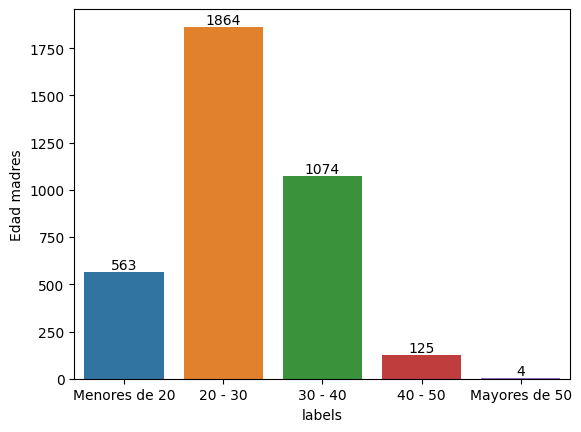

In [ ]:
ax = sns.barplot(edadesDF, y='Edad madres', x='labels', estimator="sum", errorbar=None)
ax.bar_label(ax.containers[0], fontsize=10);

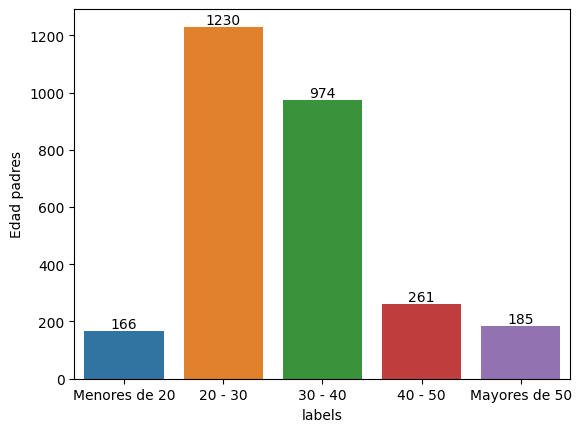

In [ ]:
ax = sns.barplot(edadesDF, y='Edad padres', x='labels', estimator="sum", errorbar=None)
ax.bar_label(ax.containers[0], fontsize=10);

# Numero de embarazos
Primigesta (1 embarazo)
Multigesta (2 a 5 embarazos)
Gran multigesta (6 o más embarazos)

In [ ]:
etiqueta = 'NUMEROEMBARAZOS'
numero_embarazos = [
    len(mc_df[
        mc_df[etiqueta] == 1
    ]),
    len(mc_df[
        (mc_df[etiqueta] >= 2) & (mc_df[etiqueta] < 6)
    ]),

    len(mc_df[
        mc_df[etiqueta] >= 6
    ])
]
numero_embarazos

[1210, 2322, 98]

#Hijos nacidos muertos
Sí o no

In [ ]:
etiqueta = 'HIJOSNACIDOSMUERTOS'
hijos_nacidos_muertos = [
    len(mc_df[
        mc_df[etiqueta] >= 1 # un hijo o mas
    ]),
    len(mc_df[
        mc_df[etiqueta] == 0 # ningun hijo
    ])
]
hijos_nacidos_muertos

[734, 2896]

# Madre sobrevivio parto SOBREVIVIOPARTO
* Si 1
* No 2
* no aplica, se ignora, no especificado 0, 8, 9


In [ ]:
etiqueta = 'SOBREVIVIOPARTO'
no_especificado = [0, 8, 9]
sobrevivio_parto = [
    len(mc_df[
        mc_df[etiqueta] == 1
    ]),
    len(mc_df[
        mc_df[etiqueta] == 2
    ]),
     len(mc_df[
        mc_df[etiqueta].isin(no_especificado)
    ])
]
sobrevivio_parto

[3627, 0, 3]

#Madre recibio atencion prenatal
* Si 1
* No 2
* no aplica, se ignora, no especificado 0, 8, 9

In [ ]:
etiqueta = 'ATENCIONPRENATAL'
no_especificado = [0, 8, 9]
hijos_nacidos_muertos = [
    len(mc_df[
        mc_df[etiqueta] == 1
    ]),
    len(mc_df[
        mc_df[etiqueta] == 2
    ]),
     len(mc_df[
        mc_df[etiqueta].isin(no_especificado)
    ])
]
hijos_nacidos_muertos


[3502, 110, 18]

#Trimestre de primer consulta
Trimestre 1
Trimestre 2
Trimestre 3

In [ ]:
etiqueta = 'TRIMESTREPRIMERCONSULTA'
trimestre_primer_consulta = [
    len(mc_df[
        mc_df[etiqueta] == 1
    ]),
    len(mc_df[
        mc_df[etiqueta] == 2
    ]),
    len(mc_df[
        mc_df[etiqueta] == 3
    ])
]
trimestre_primer_consulta

[2630, 694, 113]

# Total de consulta durante el embarazo
Suficiente (5 o mas citas)
Insuficiente (1-4 citas)
No recibió (0 citas)

In [ ]:
etiqueta = 'TOTALCONSULTAS'
total_consultas_durante_embarazo = [
    len(mc_df[
        mc_df[etiqueta] == 0
    ]),
    len(mc_df[
        (mc_df[etiqueta] >= 1) & (mc_df[etiqueta] < 5)
    ]),

    len(mc_df[
        mc_df[etiqueta] >= 5
    ])
]
total_consultas_durante_embarazo

[109, 496, 3003]

# Numeros de consultas durante el embarazo
0
1
2
3
4
5
Más de 5

In [ ]:
etiqueta = 'TOTALCONSULTAS'
total_consultas_durante_embarazo = [
    len(mc_df[
        mc_df[etiqueta] == 0
    ]),
    len(mc_df[
        mc_df[etiqueta] == 1
    ]),
    len(mc_df[
        mc_df[etiqueta] == 2
    ]),
    len(mc_df[
        mc_df[etiqueta] == 3
    ]),
    len(mc_df[
        mc_df[etiqueta] == 4
    ]),
    len(mc_df[
        mc_df[etiqueta] == 5
    ]),
    len(mc_df[
        mc_df[etiqueta] > 5
    ])
]
total_consultas_durante_embarazo

[109, 41, 71, 140, 244, 420, 2583]

#Escolaridad materna
Ninguno (0, 1, 32, 88, 99)
Primaria completa (31, 52, 112)
Secundaria completa (51, 72)
Bachillerato o preparatoria completa (71, 82)
Licenciatura completa (81, 102)
Posgrado (101)
Tecnico terminal (111, 131, 132)


In [ ]:
etiqueta = 'ESCOLARIDAD'
ninguno = [0, 1, 32, 88, 99]
primaria_completa = [31, 52, 112]
secundaria_completa = [51, 72]
bachiller = [71, 82]
licenciatura = [81, 102]
posgrado = [101]
tecnico = [111, 131, 132]
escolaridad_materna = [
    len(
        mc_df[mc_df[etiqueta].isin(ninguno)]
    ),
    len(
        mc_df[mc_df[etiqueta].isin(primaria_completa)]
    ),
    len(
        mc_df[mc_df[etiqueta].isin(secundaria_completa)]
    ),
    len(
        mc_df[mc_df[etiqueta].isin(bachiller)]
    ),
    len(
        mc_df[mc_df[etiqueta].isin(licenciatura)]
    ),
    len(
        mc_df[mc_df[etiqueta].isin(posgrado)]
    ),
    len(
        mc_df[mc_df[etiqueta].isin(tecnico)]
    )
]

escolaridad_materna

[205, 449, 1383, 982, 526, 43, 42]

# Entidad federativa de parto ENTIDADFEDERATIVAPARTO
df.agg(['count', 'size', 'nunique'])


In [ ]:
tmp = mc_df.groupby('ENTIDADFEDERATIVAPARTO').agg(['count', 'size', 'nunique']).stack()

# Sexo del recien nacido SEXO
* Hombre 1
* mujer 2
* no especificado 0,9

In [ ]:
etiqueta = 'SEXO'
sexo_mc_df = [
    len(mc_df[
        mc_df[etiqueta] == 1
    ]),
    len(mc_df[
        mc_df[etiqueta] == 2
    ]),
    len(mc_df[
        (mc_df[etiqueta] == 0) | (mc_df[etiqueta] == 9)
    ])
]
sexo_mc_df

[1954, 1668, 8]

# Edad gestacional EDADGESTACIONAL
* pretermino =<36 semanas
* termino 37-41 semanas
* postermino =>42 semanas

In [ ]:
etiqueta = 'EDADGESTACIONAL'
edad_gestacional_mc_df = [
    len(mc_df[
        mc_df[etiqueta] <= 36
    ]),
    len(mc_df[
        (mc_df[etiqueta] > 36) & (mc_df[etiqueta] < 42)
    ]),
    len(mc_df[
        (mc_df[etiqueta] >= 42)
    ])
]
edad_gestacional_mc_df

[517, 3076, 37]

# Peso del recien nacido PESO
* bajo peso =<2499gr
* normopeso 2500-3999gr
* macrosomico =>4000 gr

In [ ]:
etiqueta = 'PESO'
peso_mc_df = [
    len(mc_df[
        mc_df[etiqueta] < 2500
    ]),
    len(mc_df[
        (mc_df[etiqueta] >= 2500) & (mc_df[etiqueta] < 4000)
    ]),
    len(mc_df[
        (mc_df[etiqueta] >= 4000)
    ])
]
peso_mc_df

[438, 2840, 352]

# Talla del recien nacido TALLA
* segun formula OMS luego averiguamos

# Puntaje escala APGAR a los 5 minutos de recien nacido con MCF APGAR
* Normal 7-10 puntos
* Depresion moderada 4-6 puntos
* Depresion severa 0-3 puntos

In [ ]:
etiqueta = 'APGAR'
apgar_mc_df = [
    len(mc_df[
        (mc_df[etiqueta] >= 7) & (mc_df[etiqueta] <= 10)
    ]),
    len(mc_df[
        (mc_df[etiqueta] >= 4) & (mc_df[etiqueta] <= 6)
    ]),
    len(mc_df[
        (mc_df[etiqueta] >= 0) & (mc_df[etiqueta] <= 3)
    ])
]
apgar_mc_df

[3512, 58, 47]

# Puntaje escala APGAR a los 5 minutos de poblacion sana APGAR
los sanos son los que no tienen nada o 0000 en anomalia 1 o 2
* Normal 7-10 puntos
* Depresion moderada 4-6 puntos
* Depresion severa 0-3 puntos

In [ ]:
etiqueta = 'APGAR'
apgar_nmc_df = [
    len(nmc_df[
        (nmc_df[etiqueta] >= 7) & (nmc_df[etiqueta] <= 10)
    ]),
    len(nmc_df[
        (nmc_df[etiqueta] >= 4) & (nmc_df[etiqueta] <= 6)
    ]),
    len(nmc_df[
        (nmc_df[etiqueta] >= 0) & (nmc_df[etiqueta] <= 3)
    ])
]
apgar_nmc_df

[1541166, 4955, 10311]

# Puntaje escala Silverman Anderson en recien nacidos con MCF SILVERMAN
* sin dificultad respiratoria
* dificultad respiratoria leve 1-3 puntos
* dificultad respiratoria moderada 4-6 puntos
* dificultad respiratoria severa 7-10 puntos

In [ ]:
etiqueta = 'SILVERMAN'
silverman_mc_df = [
    len(mc_df[
        (mc_df[etiqueta] == 0)
    ]),
    len(mc_df[
        (mc_df[etiqueta] >= 1) & (mc_df[etiqueta] <= 3)
    ]),
    len(mc_df[
        (mc_df[etiqueta] >= 4) & (mc_df[etiqueta] <= 6)
    ]),
    len(mc_df[
        (mc_df[etiqueta] >= 7) & (mc_df[etiqueta] <= 10)
    ])
]
silverman_mc_df

[2915, 609, 65, 19]

# Puntaje escala Silverman Anderson de poblacion sana SILVERMAN
los sanos son los que no tienen nada o 0000 en anomalia 1 o 2
* sin dificultad respiratoria
* dificultad respiratoria leve 1-3 puntos
* dificultad respiratoria moderada 4-6 puntos
* dificultad respiratoria severa 7-10 puntos


In [ ]:
etiqueta = 'SILVERMAN'
silverman_nmc_df = [
    len(nmc_df[
        (nmc_df[etiqueta] == 0)
    ]),
    len(nmc_df[
        (nmc_df[etiqueta] >= 1) & (nmc_df[etiqueta] <= 3)
    ]),
    len(nmc_df[
        (nmc_df[etiqueta] >= 4) & (nmc_df[etiqueta] <= 6)
    ]),
    len(nmc_df[
        (nmc_df[etiqueta] >= 7) & (nmc_df[etiqueta] <= 10)
    ])
]
silverman_nmc_df

[1400596, 133829, 6488, 14337]

# Tipo de producto embarazo PRODUCTOEMBARAZO
* unico 1
* multiple 2, 3
* no especificado 0

In [ ]:
etiqueta = 'PRODUCTOEMBARAZO'
producto_embarazo_mc_df = [
    len(mc_df[
        (mc_df[etiqueta] == 1)
    ]),
    len(mc_df[
        (mc_df[etiqueta] == 2) | (mc_df[etiqueta] == 3)
    ]),
    len(mc_df[
        (mc_df[etiqueta] == 0)
    ])
]
producto_embarazo_mc_df

[3558, 62, 10]

# Total productos extraidos TOTALPRODUCTOS
* 1
* 2
* 3
* 4 o mas


etiqueta = 'TOTALPRODUCTOS'

In [ ]:
etiqueta='TOTALPRODUCTOS'
total_productos_mc_df = [
    len(mc_df[
        (mc_df[etiqueta] == 1)
    ]),
    len(mc_df[
        (mc_df[etiqueta] == 2)
    ]),
    len(mc_df[
        (mc_df[etiqueta] == 3)
    ]),
    len(mc_df[
    (mc_df[etiqueta] == 4) | (mc_df[etiqueta] == 8)
    ])
]
total_productos_mc_df

[0, 43, 1, 0]

# Procedimiento utilizado para resolucion del embarazo RESOLUCIONEMBARAZO
* no especificado 0
* eutocico 1
* distocico 2
* cesarea 3
* otro 8

In [ ]:
etiqueta = 'RESOLUCIONEMBARAZO'
resolucion_embarazo_mc_df = [
    len(mc_df[
        (mc_df[etiqueta] == 0)
    ]),
    len(mc_df[
        (mc_df[etiqueta] == 1)
    ]),
    len(mc_df[
        (mc_df[etiqueta] == 2)
    ]),
    len(mc_df[
        (mc_df[etiqueta] == 3)
    ]),
    len(mc_df[
        (mc_df[etiqueta] == 8)
    ])
]
resolucion_embarazo_mc_df

[27, 1485, 42, 2070, 6]

# Utilizo forceps UTILIZO FORCEPS
* no especificado, otro, no aplica, se ignora 0, 3, 8, 9
* si 1
* no 2

In [ ]:
etiqueta = 'UTILIZOFORCEPS'
no_aplica = [0, 3, 8, 9]
utilizo_forceps_mc_df = [
    len(mc_df[
        (mc_df[etiqueta].isin(no_aplica))
    ]),
    len(mc_df[
        (mc_df[etiqueta] == 1)
    ]),
    len(mc_df[
        (mc_df[etiqueta] == 2)
    ])
]
utilizo_forceps_mc_df

[3582, 18, 30]

In [ ]:
df.max()

EDAD                        999
NUMEROEMBARAZOS              99
HIJOSNACIDOSMUERTOS          99
ATENCIONPRENATAL              9
TRIMESTREPRIMERCONSULTA       9
TOTALCONSULTAS             99.0
SOBREVIVIOPARTO               9
ESCOLARIDAD                 132
EDADPADRE                  99.0
SEXO                          9
EDADGESTACIONAL              99
TALLA                        99
PESO                       9999
APGAR                        99
SILVERMAN                    99
PRODUCTOEMBARAZO              3
TOTALPRODUCTOS              5.0
CODIGOCIEANOMALIA1         Z208
CODIGOCIEANOMALIA2         ´000
RESOLUCIONEMBARAZO            8
UTILIZOFORCEPS                9
ENTIDADFEDERATIVAPARTO       32
dtype: object

# medidas descriptivas

In [ ]:
mc_df=mc_df.drop(mc_df[mc_df['EDAD']==999].index)
mc_df=mc_df.drop(mc_df[mc_df['EDAD']==888].index)
mc_df=mc_df.drop(mc_df[mc_df['NUMEROEMBARAZOS']==99].index)
mc_df=mc_df.drop(mc_df[mc_df['HIJOSNACIDOSMUERTOS']==99].index)
mc_df=mc_df.drop(mc_df[mc_df['ATENCIONPRENATAL']==9].index)
mc_df=mc_df.drop(mc_df[mc_df['TRIMESTREPRIMERCONSULTA']==9].index)
mc_df=mc_df.drop(mc_df[mc_df['TOTALCONSULTAS']==99].index)
mc_df=mc_df.drop(mc_df[mc_df['SOBREVIVIOPARTO']==9].index)
mc_df=mc_df.drop(mc_df[mc_df['ESCOLARIDAD']==999].index)
mc_df=mc_df.drop(mc_df[mc_df['EDADPADRE']==999].index)
mc_df=mc_df.drop(mc_df[mc_df['SEXO']==99].index)
mc_df=mc_df.drop(mc_df[mc_df['EDADGESTACIONAL']==99].index)
mc_df=mc_df.drop(mc_df[mc_df['TALLA']==99].index)
mc_df=mc_df.drop(mc_df[mc_df['PESO']==9999].index)
mc_df=mc_df.drop(mc_df[mc_df['TALLA']==9].index)
mc_df=mc_df.drop(mc_df[mc_df['APGAR']==99].index)
mc_df=mc_df.drop(mc_df[mc_df['SILVERMAN']==99].index)
mc_df=mc_df.drop(mc_df[mc_df['UTILIZOFORCEPS']==9].index)

In [ ]:
mc_df.describe().applymap('{:,.2f}'.format)

,EDAD,NUMEROEMBARAZOS,HIJOSNACIDOSMUERTOS,ATENCIONPRENATAL,TRIMESTREPRIMERCONSULTA,TOTALCONSULTAS,SOBREVIVIOPARTO,ESCOLARIDAD,EDADPADRE,SEXO,EDADGESTACIONAL,TALLA,PESO,APGAR,SILVERMAN,PRODUCTOEMBARAZO,TOTALPRODUCTOS,RESOLUCIONEMBARAZO,UTILIZOFORCEPS,ENTIDADFEDERATIVAPARTO
count,"3,276.00","3,276.00","3,276.00","3,276.00","3,276.00","3,260.00","3,276.00","3,276.00","2,535.00","3,276.00","3,276.00","3,276.00","3,276.00","3,276.00","3,276.00","3,276.00",34.00,"3,276.00","3,276.00","3,276.00"
mean,26.67,2.29,0.26,1.03,1.32,7.35,1.00,60.99,33.45,1.45,38.20,49.00,"3,012.82",8.76,0.37,1.01,2.00,2.15,7.90,16.54
std,6.61,1.35,0.58,0.18,0.96,3.34,0.02,19.59,17.05,0.50,2.22,3.32,552.09,1.01,1.00,0.13,0.00,1.01,0.80,8.33
min,12.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,15.00,0.00,22.00,28.00,400.00,0.00,0.00,0.00,2.00,0.00,0.00,1.00
25%,21.00,1.00,0.00,1.00,1.00,5.00,1.00,51.00,24.00,1.00,37.00,48.00,"2,740.00",9.00,0.00,1.00,2.00,1.00,8.00,10.00
50%,26.00,2.00,0.00,1.00,1.00,7.00,1.00,71.00,30.00,1.00,39.00,50.00,"3,050.00",9.00,0.00,1.00,2.00,3.00,8.00,15.00
75%,31.00,3.00,0.00,1.00,1.00,9.00,1.00,72.00,36.00,2.00,40.00,51.00,"3,363.25",9.00,0.00,1.00,2.00,3.00,8.00,22.00
max,52.00,13.00,5.00,2.00,8.00,30.00,1.00,132.00,99.00,2.00,42.00,61.00,"4,500.00",10.00,9.00,2.00,2.00,8.00,8.00,32.00


In [ ]:
mc_df.mode(numeric_only=True)

,EDAD,NUMEROEMBARAZOS,HIJOSNACIDOSMUERTOS,ATENCIONPRENATAL,TRIMESTREPRIMERCONSULTA,TOTALCONSULTAS,SOBREVIVIOPARTO,ESCOLARIDAD,EDADPADRE,SEXO,EDADGESTACIONAL,TALLA,PESO,APGAR,SILVERMAN,PRODUCTOEMBARAZO,TOTALPRODUCTOS,RESOLUCIONEMBARAZO,UTILIZOFORCEPS,ENTIDADFEDERATIVAPARTO
0,21,1,0,1,1,8.0,1,51,25.0,1,39,50,3000,9,0,1,2.0,3,8,15


## Agrupando por edades

In [ ]:
edades = [
    len(df[df['EDAD'] < 20]),
    len(df[(df['EDAD'] >= 20) & (df['EDAD'] < 30)]),
    len(df[(df['EDAD'] >= 30) & (df['EDAD'] < 40)]),
    len(df[(df['EDAD'] >= 40) & (df['EDAD'] < 50)]),
    len(df[df['EDAD'] >= 50])
]
labels = [
    "Menores de 20",
    "20 - 30",
    "30 - 40",
    "40 - 50",
    "Mayores de 50"]

edadesDF = pd.DataFrame({'edades': edades, 'labels': labels},
                  index=labels)

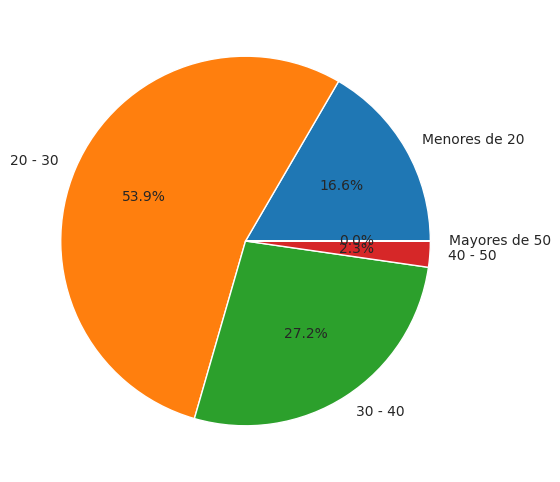

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(6,6))
plt.pie(edadesDF['edades'], labels=edadesDF['labels'], autopct='%1.1f%%')
plt.show()

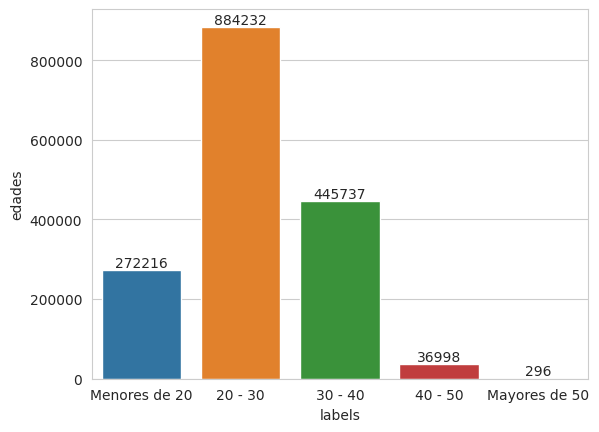

In [ ]:
ax = sns.barplot(edadesDF, y='edades', x='labels', estimator="sum", errorbar=None)
ax.bar_label(ax.containers[0], fontsize=10);